In [1]:
# Make the output of plotting commands be displayed inline within the notebook,
%matplotlib inline 
#from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api

plt.rcParams['figure.figsize']=(20,10)
%config InlineBackend.figure_format="jpeg"

In [60]:
!wget "www.ftp.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.2017010106/gfs.t06z.pgrb2.0p50.f006"

--2017-01-01 13:06:25--  http://www.ftp.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.2017010106/gfs.t06z.pgrb2.0p50.f006
Auflösen des Hostnamen »www.ftp.ncep.noaa.gov (www.ftp.ncep.noaa.gov)«... 140.90.101.61
Verbindungsaufbau zu www.ftp.ncep.noaa.gov (www.ftp.ncep.noaa.gov)|140.90.101.61|:80... verbunden.
HTTP-Anforderung gesendet, warte auf Antwort... 200 OK
Länge: 71493716 (68M) [text/plain]
In »»gfs.t06z.pgrb2.0p50.f006«« speichern.

100%[======================================>] 71.493.716  1,39MB/s   in 35s    

2017-01-01 13:07:00 (1,95 MB/s) - »»gfs.t06z.pgrb2.0p50.f006«« gespeichert [71493716/71493716]



## PYGRIB

In [22]:
grbs = pygrib.open('gfs.t06z.pgrb2.0p50.f006')

In [23]:
grbs

In [24]:
import mpl_toolkits
import pandas as pd

In [25]:
grbs.rewind() # rewind the iterator
from datetime import datetime
date_valid = datetime(2017,1,10,6)
t2mens = []
grb_n=[]
for grb in grbs:
    if grb.level== 0: #grb.parameterName == 'Wind speed (gust)' : 
        t2mens.append(grb.values)
        grb_n.append(str(grb))
t2mens = np.array(t2mens)
#print t2mens.shape, t2mens.min(), t2mens.max()
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

min/max lat and lon -90.0 90.0 0.0 359.5


In [32]:
i=0
for grb in grbs[:]:
    #print i,grb.level,grb.name,grb.values.shape,grb.values.min(), "-", grb.values.max(),grb.values.size
    i=i+1

In [33]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import cartopy

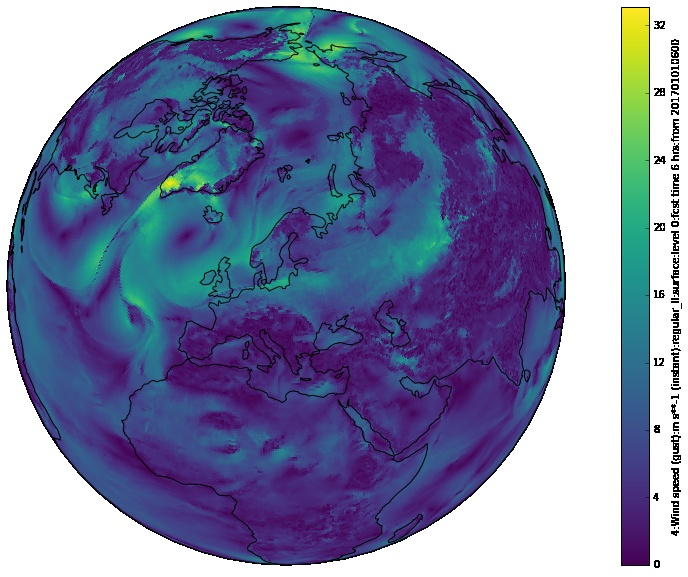

In [34]:
#a0 = xr.DataArray(np.zeros((40, 30)), dims=('y', 'x'),name='temperature')
#a0[0, 0] = 1.2
nr=3

a0 = xr.DataArray(t2mens[nr,:,:], dims=('y', 'x'),name=grb_n[nr])
a0.coords['y']=np.linspace(90,-90,361)
a0.coords['x']=np.linspace(0,359.99,720)

ax = plt.axes(projection=ccrs.Orthographic(20, 55))

a0.plot(ax=ax,transform=ccrs.PlateCarree())

ax.set_global()
#air.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines();

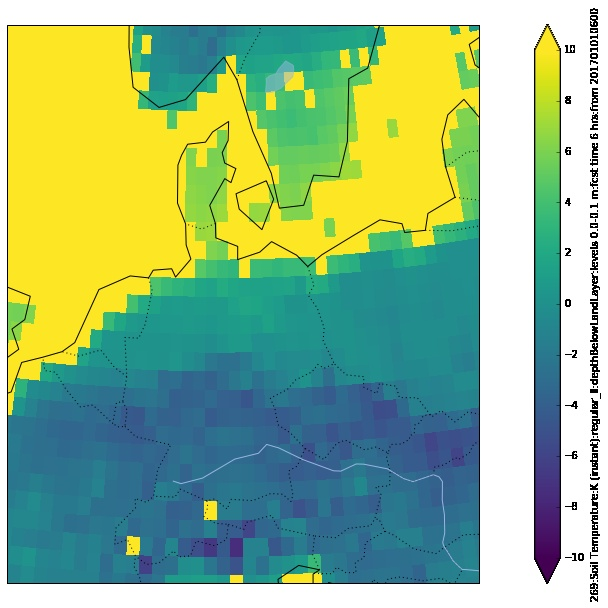

In [35]:
#a0 = xr.DataArray(np.zeros((40, 30)), dims=('y', 'x'),name='temperature')
#a0[0, 0] = 1.2
nr=9

a0 = xr.DataArray(t2mens[nr,:,:]-273.15, dims=('y', 'x'),name=grb_n[nr])
a0.coords['y']=np.linspace(90,-90,361)
a0.coords['x']=np.linspace(0,359.99,720)

ax = plt.axes(projection=ccrs.Orthographic(10, 52))

a0.plot(ax=ax,transform=ccrs.PlateCarree(),vmax=10,vmin=-10)

ax.set_global()
#air.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([2, 20, 45, 60])

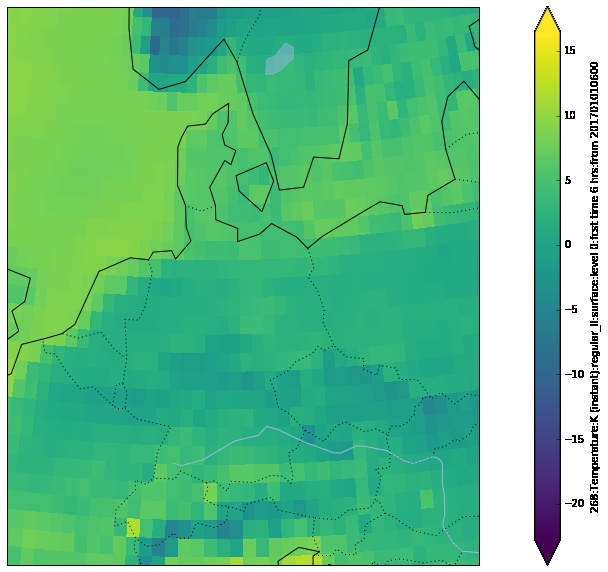

In [48]:
#a0 = xr.DataArray(np.zeros((40, 30)), dims=('y', 'x'),name='temperature')
#a0[0, 0] = 1.2
nr=8

a0 = xr.DataArray(t2mens[nr,:,:]-273.15, dims=('y', 'x'),name=grb_n[nr])
a0.coords['y']=np.linspace(90,-90,361)
a0.coords['x']=np.linspace(0,359.99,720)

ax = plt.axes(projection=ccrs.Orthographic(10, 52))

a0.plot(ax=ax,transform=ccrs.PlateCarree(),vmin=np.percentile(a0,15),vmax=np.percentile(a0.values[a0.values<1e+35],60))

ax.set_global()
#air.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines();
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([2, 20, 45, 60])

In [51]:
a0

<xarray.DataArray '268:Temperature:K (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201701010600' (y: 361, x: 720)>
array([[-27.54998779, -27.54998779, -27.54998779, ..., -27.54998779,
        -27.54998779, -27.54998779],
       [-27.94999695, -27.94999695, -27.94999695, ..., -27.44999695,
        -27.54998779, -27.74998474],
       [-26.34999084, -26.44999695, -26.54998779, ..., -26.34999084,
        -26.34999084, -26.34999084],
       ..., 
       [-25.54998779, -25.54998779, -25.54998779, ..., -25.54998779,
        -25.54998779, -25.54998779],
       [-24.94999695, -24.94999695, -24.94999695, ..., -24.94999695,
        -24.94999695, -24.94999695],
       [-23.34999084, -23.34999084, -23.34999084, ..., -23.34999084,
        -23.34999084, -23.34999084]], dtype=float32)
Coordinates:
  * y        (y) float64 90.0 89.5 89.0 88.5 88.0 87.5 87.0 86.5 86.0 85.5 ...
  * x        (x) float64 0.0 0.5007 1.001 1.502 2.003 2.503 3.004 3.505 ...

In [52]:
#SEL= a0.sel(x=np.linspace(5,15,25), method='nearest').sel(y=np.linspace(45,65,25), method='nearest')

SEL= a0.sel(x=slice(5, 15)).sel(y=slice(55,45))  #Daten ausschneiden

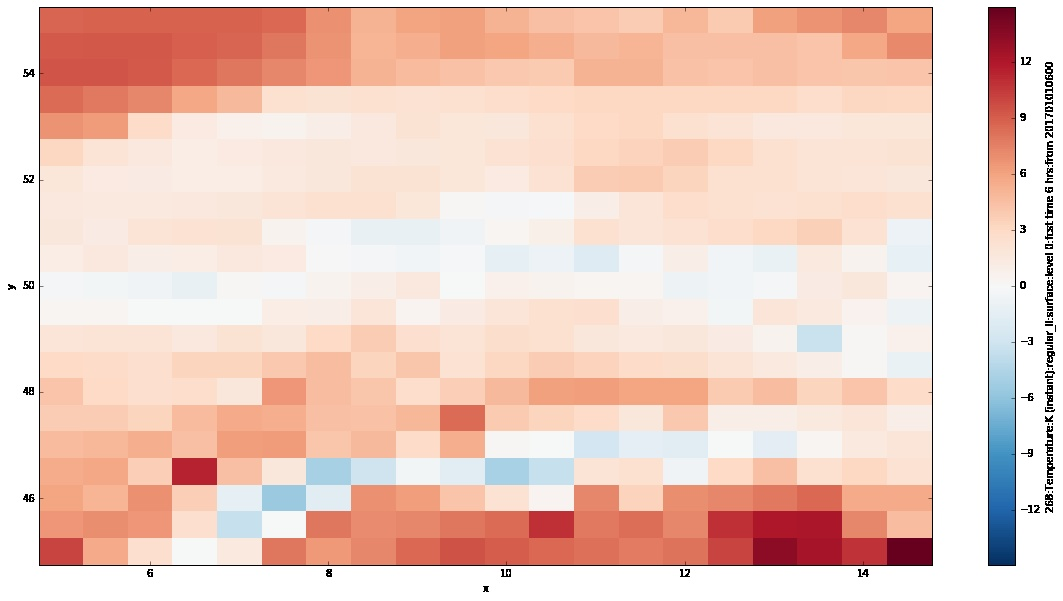

In [53]:
SEL.plot()